In [9]:
import spacy

import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt
pd.options.display.max_colwidth = 200
%matplotlib inline

In [10]:
nlp = spacy.load('en_vectors_web_lg')


In [11]:
total_vectors = len(nlp.vocab.vectors)


In [12]:
print('Total word vectors:', total_vectors)


Total word vectors: 1070971


In [24]:
corpus = ['The sky is blue and beautiful.',
          'Love this blue and beautiful sky!',
          'The quick brown fox jumps over the lazy dog.',
          "A king's breakfast has sausages, ham, bacon, eggs, toast and beans",
          'I love green eggs, ham, sausages and bacon!',
          'The brown fox is quick and the blue dog is lazy!',
          'The sky is very blue and the sky is very beautiful today',
          'The dog is lazy but the brown fox is quick!'    
]

In [25]:
labels = ['weather', 'weather', 'animals', 'food', 'food', 'animals', 'weather', 'animals']
corpus = np.array(corpus)
corpus_df = pd.DataFrame({'Document': corpus, 
                          'Category': labels})
corpus_df = corpus_df[['Document', 'Category']]

In [26]:
wpt = nltk.WordPunctTokenizer()
stop_words = nltk.corpus.stopwords.words('english')

def normalize_document(doc):
    # lower case and remove special characters\whitespaces
    doc = re.sub(r'[^a-zA-Z\s]', '', doc, re.I|re.A)
    doc = doc.lower()
    doc = doc.strip()
    # tokenize document
    tokens = wpt.tokenize(doc)
    # filter stopwords out of document
    filtered_tokens = [token for token in tokens if token not in stop_words]
    # re-create document from filtered tokens
    doc = ' '.join(filtered_tokens)
    return doc

normalize_corpus = np.vectorize(normalize_document)

In [27]:
norm_corpus = normalize_corpus(corpus)

unique_words = list(set([word for sublist in [doc.split() for doc in norm_corpus] for word in sublist]))

word_glove_vectors = np.array([nlp(word).vector for word in unique_words])

pd.DataFrame(word_glove_vectors, index=unique_words)


0         1         2         3         4         5    \
dog       -0.057120  0.052685  0.003026 -0.048517  0.007043  0.041856   
fox       -0.348680 -0.077720  0.177750 -0.094953 -0.452890  0.237790   
jumps     -0.334840  0.215990 -0.350440 -0.260020  0.411070  0.154010   
breakfast  0.073378  0.227670  0.208420 -0.456790 -0.078219  0.601960   
lazy      -0.353320 -0.299710 -0.176230 -0.321940 -0.385640  0.586110   
ham       -0.773320 -0.282540  0.580760  0.841480  0.258540  0.585210   
toast      0.130740 -0.193730  0.253270  0.090102 -0.272580 -0.030571   
today     -0.156570  0.594890 -0.031445 -0.077586  0.278630 -0.509210   
quick     -0.445630  0.191510 -0.249210  0.465900  0.161950  0.212780   
beautiful  0.171200  0.534390 -0.348540 -0.097234  0.101800 -0.170860   
sky        0.312550 -0.303080  0.019587 -0.354940  0.100180 -0.141530   
blue       0.129450  0.036518  0.032298 -0.060034  0.399840 -0.103020   
sausages  -0.174290 -0.064869 -0.046976  0.287420 -0.128150  0.647630   
beans     -0.423290 -0.264500  0.200870  0.082187  0.066944  1.027600   
brown     -0.374120 -0.076264  0.109260  0.186620  0.029943  0.182700   
eggs      -0.417810 -0.035192 -0.126150 -0.215930 -0.669740  0.513250   
bacon     -0.430730 -0.016025  0.484620  0.101390 -0.299200  0.761820   
green     -0.072368  0.233200  0.137260 -0.156630  0.248440  0.349870   
love       0.139490  0.534530 -0.252470 -0.125650  0.048748  0.152440   
kings      0.259230 -0.854690  0.360010 -0.642000  0.568530 -0.321420   

                6         7         8         9      ...          290  \
dog       -0.024704 -0.039783  0.009614  0.308416    ...     0.003257   
fox        0.209440  0.037886  0.035064  0.899010    ...    -0.283050   
jumps     -0.386110  0.206380  0.386700  1.460500    ...    -0.107030   
breakfast -0.024494 -0.467980  0.054627  2.283700    ...     0.647710   
lazy       0.411160 -0.418680  0.073093  1.486500    ...     0.402310   
ham       -0.021890 -0.463680  0.139070  0.658720    ...     0.464470   
toast      0.096945 -0.115060  0.484000  0.848380    ...     0.142080   
today     -0.066350 -0.081890 -0.047986  2.803600    ...    -0.326580   
quick     -0.046480  0.021170  0.417660  1.686900    ...    -0.329460   
beautiful  0.295650 -0.041816 -0.516550  2.117200    ...    -0.285540   
sky       -0.514270  0.886110 -0.530540  1.556600    ...    -0.667050   
blue      -0.507880  0.076630 -0.422920  0.815730    ...    -0.501280   
sausages   0.056315 -0.240440 -0.025094  0.502220    ...     0.302240   
beans     -0.989140 -0.259950  0.145960  0.766450    ...     0.048760   
brown     -0.631980  0.133060 -0.128980  0.603430    ...    -0.015404   
eggs      -0.797090 -0.068611  0.634660  1.256300    ...    -0.232860   
bacon     -0.353130 -0.325290  0.156730  0.873210    ...     0.304240   
green     -0.241700 -0.091426 -0.530150  1.341300    ...    -0.405170   
love       0.199060 -0.065970  0.128830  2.055900    ...    -0.124380   
kings      0.173250  0.133030 -0.089720  1.528600    ...    -0.470090   

                291       292       293       294       295       296  \
dog       -0.036864 -0.043878  0.000249 -0.026959  0.077895  0.044350   
fox        0.270240 -0.654800  0.105300 -0.068738 -0.534750  0.061783   
jumps     -0.279480 -0.186200 -0.543140 -0.479980 -0.284680  0.036022   
breakfast  0.373820  0.019931 -0.033672 -0.073184  0.296830  0.340420   
lazy      -0.038554 -0.288670 -0.244130  0.460990  0.514170  0.136260   
ham        0.481400 -0.829200  0.354910  0.224530 -0.493920  0.456930   
toast      0.481910  0.045167  0.057151 -0.149520 -0.495130 -0.086677   
today     -0.413380  0.367910 -0.262630 -0.203690 -0.296560 -0.014873   
quick      0.421860 -0.039543  0.150180  0.338220  0.049554  0.149420   
beautiful  0.104670  0.126310  0.120040  0.254380  0.247400  0.207670   
sky        0.279110  0.500970 -0.277580 -0.143720  0.342710  0.287580   
blue       0.169010  0.548250 -0.319380 -0.072887  0.382950  0.237410   

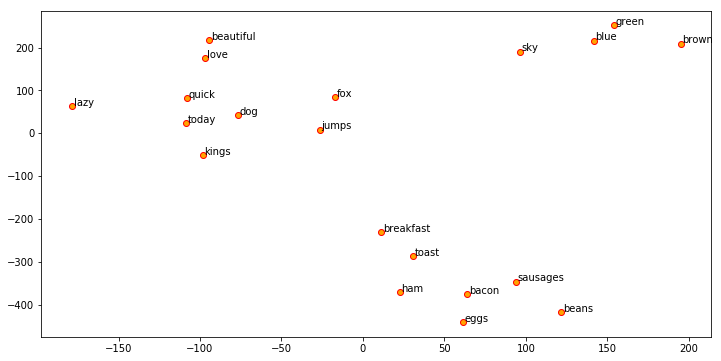

In [28]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=0, n_iter=5000, perplexity=3)
np.set_printoptions(suppress=True)
T = tsne.fit_transform(word_glove_vectors)
labels = unique_words

plt.figure(figsize=(12, 6))
plt.scatter(T[:, 0], T[:, 1], c='orange', edgecolors='r')
for label, x, y in zip(labels, T[:, 0], T[:, 1]):
    plt.annotate(label, xy=(x+1, y+1), xytext=(0, 0), textcoords='offset points')

In [29]:
doc_glove_vectors = np.array([nlp(str(doc)).vector for doc in norm_corpus])


In [30]:
from sklearn.cluster import KMeans


km = KMeans(n_clusters=3, random_state=0)
km.fit_transform(doc_glove_vectors)
cluster_labels = km.labels_
cluster_labels = pd.DataFrame(cluster_labels, columns=['ClusterLabel'])
pd.concat([corpus_df, cluster_labels], axis=1)

Document  \
0                                      The sky is blue and beautiful.   
1                                   Love this blue and beautiful sky!   
2                        The quick brown fox jumps over the lazy dog.   
3  A king's breakfast has sausages, ham, bacon, eggs, toast and beans   
4                         I love green eggs, ham, sausages and bacon!   
5                    The brown fox is quick and the blue dog is lazy!   
6            The sky is very blue and the sky is very beautiful today   
7                         The dog is lazy but the brown fox is quick!   

  Category  ClusterLabel  
0  weather             2  
1  weather             2  
2  animals             1  
3     food             0  
4     food             0  
5  animals             1  
6  weather             2  
7  animals             1